NAMA : ARDHI RAMADHANI

ASAL : Cileungsi

EMAIL : ardhidhani@gmail.com

In [145]:
import tensorflow as tf
import zipfile,os,shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.3.0


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-29 16:19:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  15.0MB/s    in 16s     

2020-10-29 16:20:06 (19.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [42]:
# mengekstrak dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [43]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'rps-cv-images')

In [44]:
os.listdir(base_dir)

['scissors',
 'paper',
 'rock',
 'rps-cv-images',
 'val',
 'train',
 'README_rpc-cv-images.txt']

In [45]:
os.listdir(train_dir)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [116]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split=0.4) #Data validation 40%
    
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    vertical_flip = True,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.4) #Data validation 40%

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

In [112]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')       
])

In [118]:
#compile model
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 36992)           

In [121]:
# mencegah overfitting dengan callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [122]:
model.fit(
    train_generator,
    steps_per_epoch = 42,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 28,
    verbose =2,
    callbacks=[callbacks])

Epoch 1/20
42/42 - 75s - loss: 0.1369 - accuracy: 0.9482 - val_loss: 0.1802 - val_accuracy: 0.9336
Epoch 2/20
42/42 - 75s - loss: 0.1239 - accuracy: 0.9574 - val_loss: 0.1718 - val_accuracy: 0.9428
Epoch 3/20
42/42 - 75s - loss: 0.0854 - accuracy: 0.9696 - val_loss: 0.1375 - val_accuracy: 0.9600
Epoch 4/20

Akurasi di atas 97%, hentikan training!
42/42 - 75s - loss: 0.0609 - accuracy: 0.9817 - val_loss: 0.1619 - val_accuracy: 0.9531


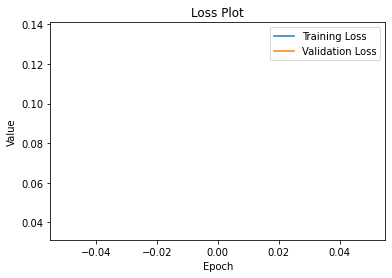

In [123]:
from matplotlib import pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving wqeqw.jpg to wqeqw.jpg
wqeqw.jpg
rock


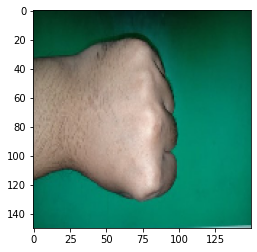

In [153]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  paper     = "[[1. 0. 0.]]"
  rock      = "[[0. 1. 0.]]"
  scissors  = "[[0. 0. 1.]]"
  
  result = np.array_str(classes) 

  print(fn)

  if result == paper :
     print("paper")
  elif result == rock :
     print("rock")
  elif result == scissors :
     print("scissors")
  else :
    print("Tidak Dikenali")